# Исследование рынка видеоигр

В нашем распоряжении данные из открытых источников о продажах видеоигр. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели исследования:** Определить, сколько консоли актуальны на рынке, какие консоли можно считать потенциально прибыльными на момент исследования. Выяснить, насколько влияют оценки пользователей и критиков на продажи игр. Сделать портреты типичного пользователя для каждого из исследуемых регионов. Также проверить несколько гипотез.

**Ход работы:**

Данные о видеоиграх мы получим из файла games.csv, в нем хранятся исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Сначала мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить все ошибки данных, которые не приведут к искажение конечного результата. Далее проведем исследование рынка видеоигр, посчитаем влияние отдельных факторов на продажи игр. На следующем этапе изучим пользователей отдельных регионов, определим популярные у них платформы и жанры. На последнем этапе проверим, присутствует ли статистическая значимость в оценках пользователей между двумя популярными жанрами и присутствует ли статистическая значимость в оценках пользователей между двумя платформами.

Таким образом, наше исследование пройдет в шесть основных этапов:
  1. Выгрузка данных и библиотек
  2. Предобработка данных
  3. Исследовательский анализ
  4. Составление портрета пользователей по регионам
  5. Проверка гипотез
  6. Подведение итогов

## Выгрузка данных и библиотек

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('games.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


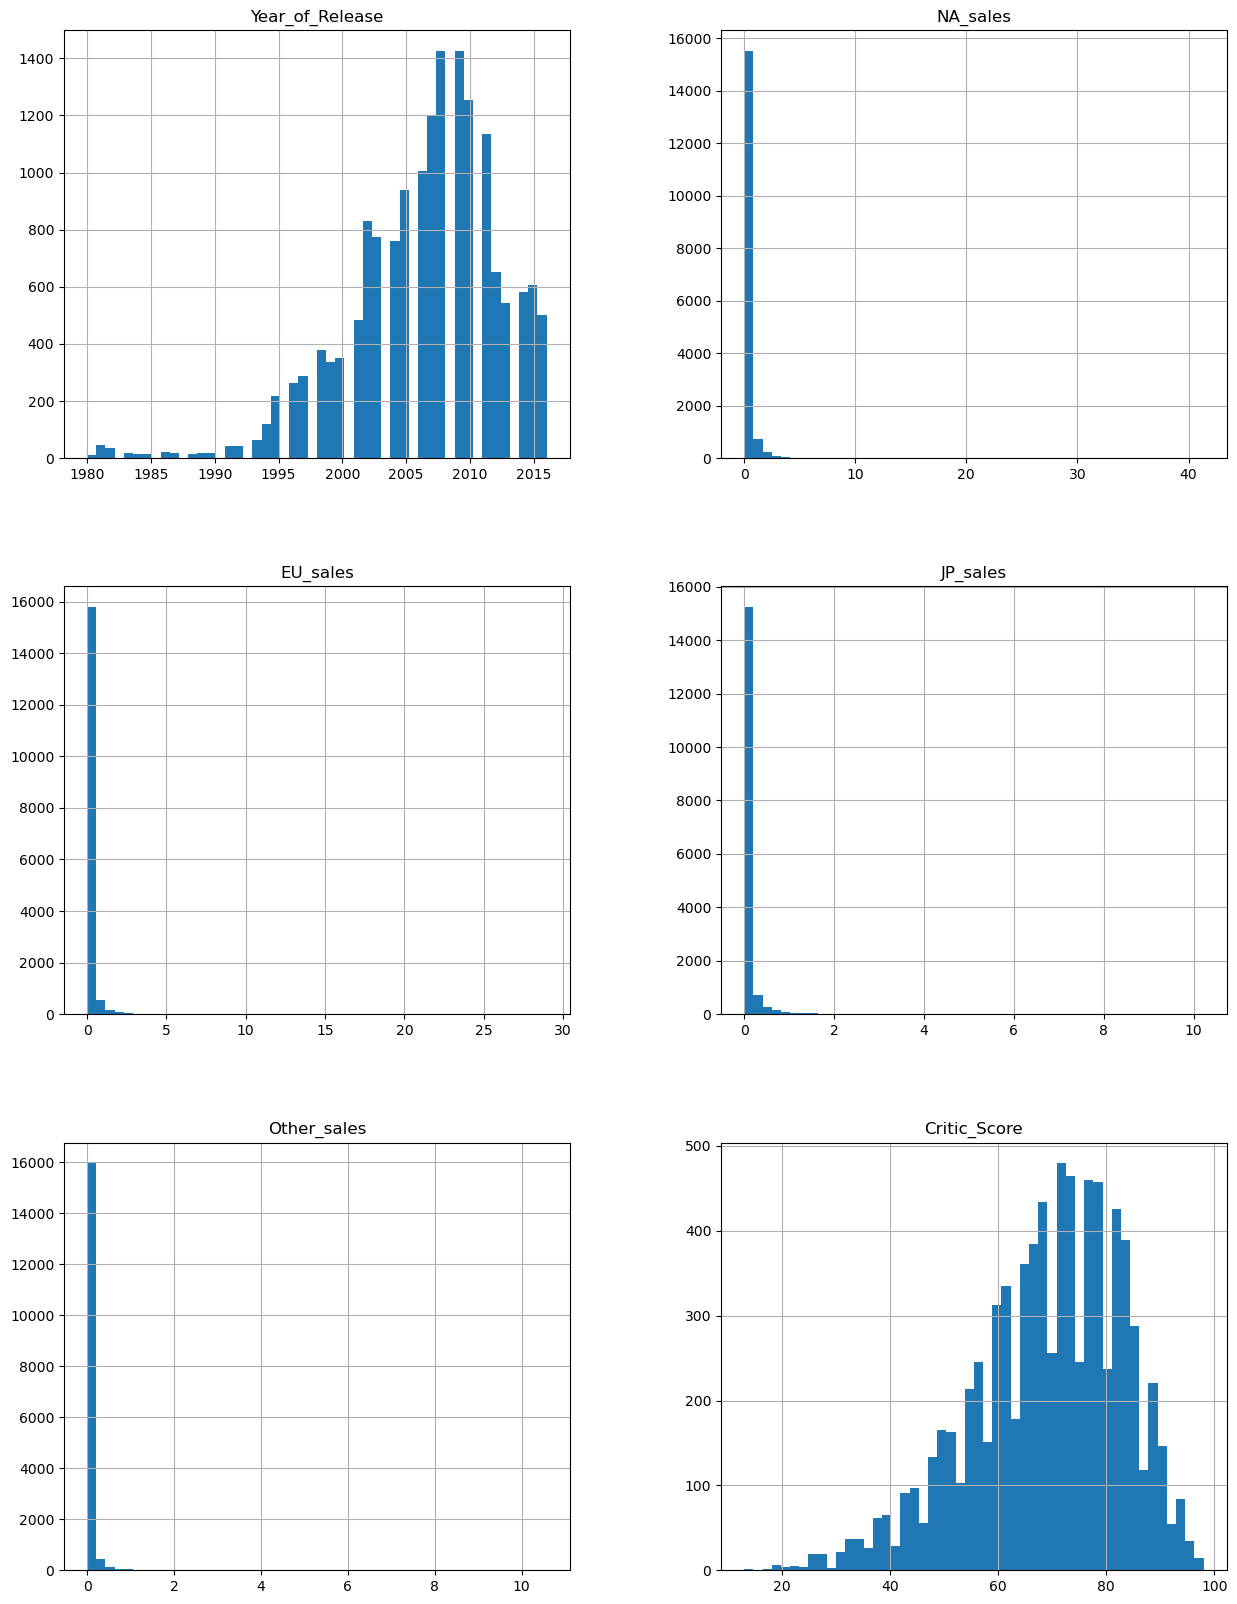

In [3]:
games.hist(figsize=(15, 20), bins=50)
games.info()

In [4]:
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


На первый взгляд сразу бросаются в глаза аномалии в столбцах с числом продаж в разных регионах, пропуски в столбцах с рейтингами игр и оценками критиков и пользователей. Также можно заметить, что не все столбцы имеют корректный тип данных, например столбец Year_of_Release имеет вещественный тип данных float.

## Предобработка данных

### Замена типа данных в столбцах

In [6]:
# замена названий столцов
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games['year_of_release'] = games['year_of_release'].astype('int', errors='ignore')
games['critic_score'] = games['critic_score'].astype('int', errors='ignore')
print('Размер датасета до оптимизации', games.memory_usage(deep=True).sum() / 1024 ** 2)

games_int = games.select_dtypes(include=['int'])
converted_int = games_int.apply(pd.to_numeric,downcast='unsigned')
games_float = games.select_dtypes(include=['float'])
converted_float = games_float.apply(pd.to_numeric,downcast='float')

games[converted_int.columns] = converted_int
games[converted_float.columns] = converted_float

print('Размер датасета после оптимизации', games.memory_usage(deep=True).sum() / 1024 ** 2)

Размер датасета до оптимизации 5.568735122680664
Размер датасета после оптимизации 5.186159133911133


Заменен типа столбца с годом релиза на целочисленный int. Заменен тип данных в столбце critic_score на int, поскольку рейтинг критиков определен целым числом в диапазоне от 0 до 100. Также оптимизированны столбцы с численными типами данных, что снизило потребление памяти на 7%.

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score присутствует значение tbd, которое означает, что рейтинг для игры еще не определен. 

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

Заменены все значения 'tbd' в user_score на NaN и изменен тип столбца на float.

### Обработка дубликатов

In [10]:
games.duplicated().sum()

0

In [11]:
games[games[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [12]:
games = games[~games[['name', 'platform', 'year_of_release']].duplicated()]

Удалены строки с повторениями в столбцах с именем, платформой и годом релиза.

### Обработка пропусков

In [13]:
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [14]:
games['name'] = games['name'].fillna('unknown')
games['year_of_release'] = games['year_of_release'].fillna(2030)
games['genre'] = games['genre'].fillna('Misc')

Заполнены пустые значения в столбцах с названием игры, годом релиза и жанром на unknown, 2030 и Misc соответственно.

В датасете присутствует большое количество пропусков в столбцах critic_score, user_score и rating. Так как восстановить первоначальные данные невозможно, а процентное соотношение пропусков слишком большое, лучшим решением будет оставить пропуски в столбцах critic_score и user_score без замены, чтобы не искажать результаты исследований. В столбце rating заменим пропуски на 'unknown'. Причин пропусков может быть несколько: ошибки при сборе данных, пропуски в рейтингах у непопулярных игр, либо совокупность этих факторов.

In [15]:
games['rating'] = games['rating'].fillna('unknown')

In [16]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
dtype: int64

### Добавление столбцов

In [17]:
games['sales_sum'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Добавлен столбец с количеством проданных копий во всех регионах.

## Исследовательский анализ данных

### Распределение количества выпущенных игр по годам

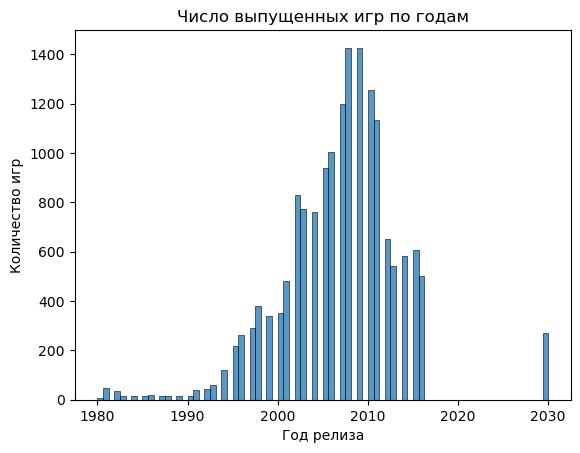

In [18]:
ax = sns.histplot(data=games, x='year_of_release')
ax.set(title='Число выпущенных игр по годам', xlabel='Год релиза', ylabel='Количество игр')
plt.show()

По гистограмме видно, число проданных копий, как и популярность игровой индустрии, имеет резкий скачек в 1995г. Это связано с тем, что домашние компьютеры, игровые консоли и игровые автоматы стали доступны для широких масс только в 1980-х годах.

### Корреляция между числом продаж у разных консолей и их актуальным сроком на рынке

In [19]:
top_platforms = games.groupby('platform')['sales_sum'].sum().sort_values(ascending=False).reset_index()
top_platforms

,platform,sales_sum
0,PS2,1255.770020
1,X360,971.419983
2,PS3,939.640015
3,Wii,907.510010
4,DS,806.119995
5,PS,730.859985
6,GBA,317.850006
7,PS4,314.140015
8,PSP,294.049988
9,PC,259.519989


In [20]:
# Выделим 6 самых популярных консолей и рассмотрим на их примере
# актуальность игровых платформ на рынке
top_platforms = top_platforms['platform'].head(6)
sales_years = games.query('platform in @top_platforms & year_of_release < 2020')\
.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum')

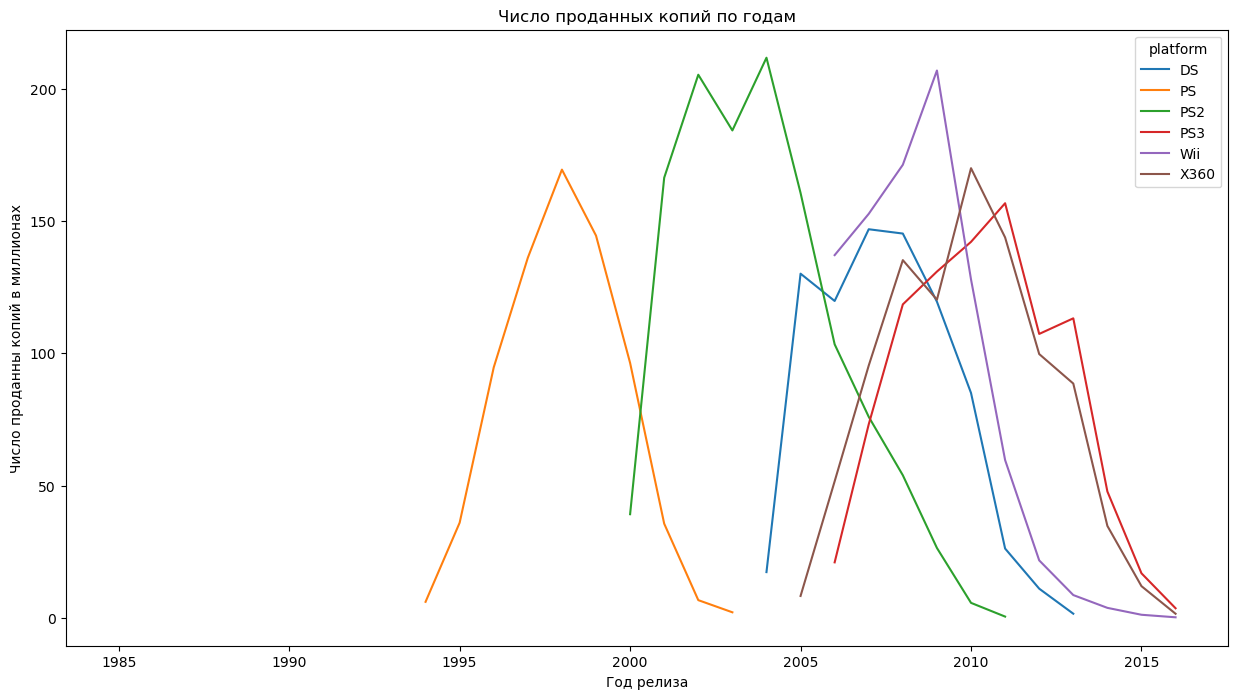

In [21]:
sales_years.plot(figsize=(15,8), title='Число проданных копий по годам', xlabel='Год релиза', ylabel='Число проданны копий в миллионах')
plt.show()

На графике показано количество продаж за исследуемый промежуток времени для 6 самых популярных консолей. Самая популярная консоль - PS2, игры на этой платформе продались наибольшее количество раз, а ее актуальность - 11 лет на рынке.

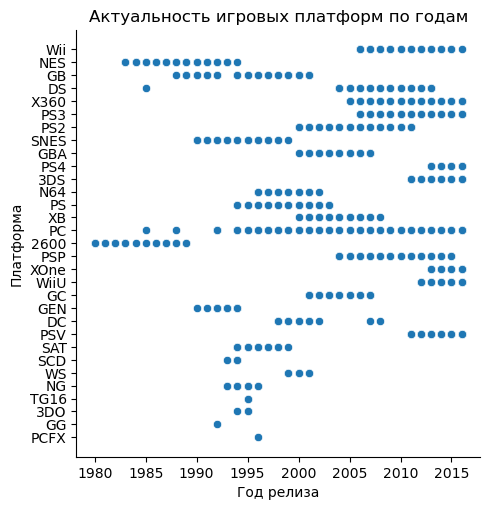

In [22]:
ax = sns.relplot(data=games.query('year_of_release < 2020'), x='year_of_release', y='platform')
ax.set(title='Актуальность игровых платформ по годам', xlabel='Год релиза', ylabel='Платформа')
plt.show()

На графике показаны промежутки актуальности для каждой платформы.

In [23]:
relevance = games.query('year_of_release < 2020')\
.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
relevance.columns = ['min', 'max']

relevance_actual = relevance.loc[np.logical_and(relevance['min'] >= 1997, relevance['min'] <= 2009)]
relevance_actual['dif'] = relevance_actual['max'] - relevance_actual['min']
print(relevance_actual['dif'].mean())
relevance_actual['dif'].sort_values(ascending=False)

8.600000381469727


C:\Users\user\AppData\Local\Temp\ipykernel_13728\3778178105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevance_actual['dif'] = relevance_actual['max'] - relevance_actual['min']


platform
PS2     11.0
PSP     11.0
X360    11.0
DC      10.0
PS3     10.0
Wii     10.0
XB       8.0
GBA      7.0
GC       6.0
WS       2.0
Name: dif, dtype: float32

Для определения актуального срока для платформ на рынке взяты платформы вышедшие не ранее 1997 и не позднее 2009 годов. Можно сказать, что в среднем консоль актуальна на рынке около 8-9 лет.

### Потециально прибыльные консоли

In [24]:
games = games.query('year_of_release >= 2003')

За актуальный возьмем период с 2003, в него включим только те консоли, вышедшие после 2003 года. В это время начала активно развиваться игровая индустрия, а именно в это время появились культовые консоли, такие как Wii, PSP, DS, PS3 и X360.

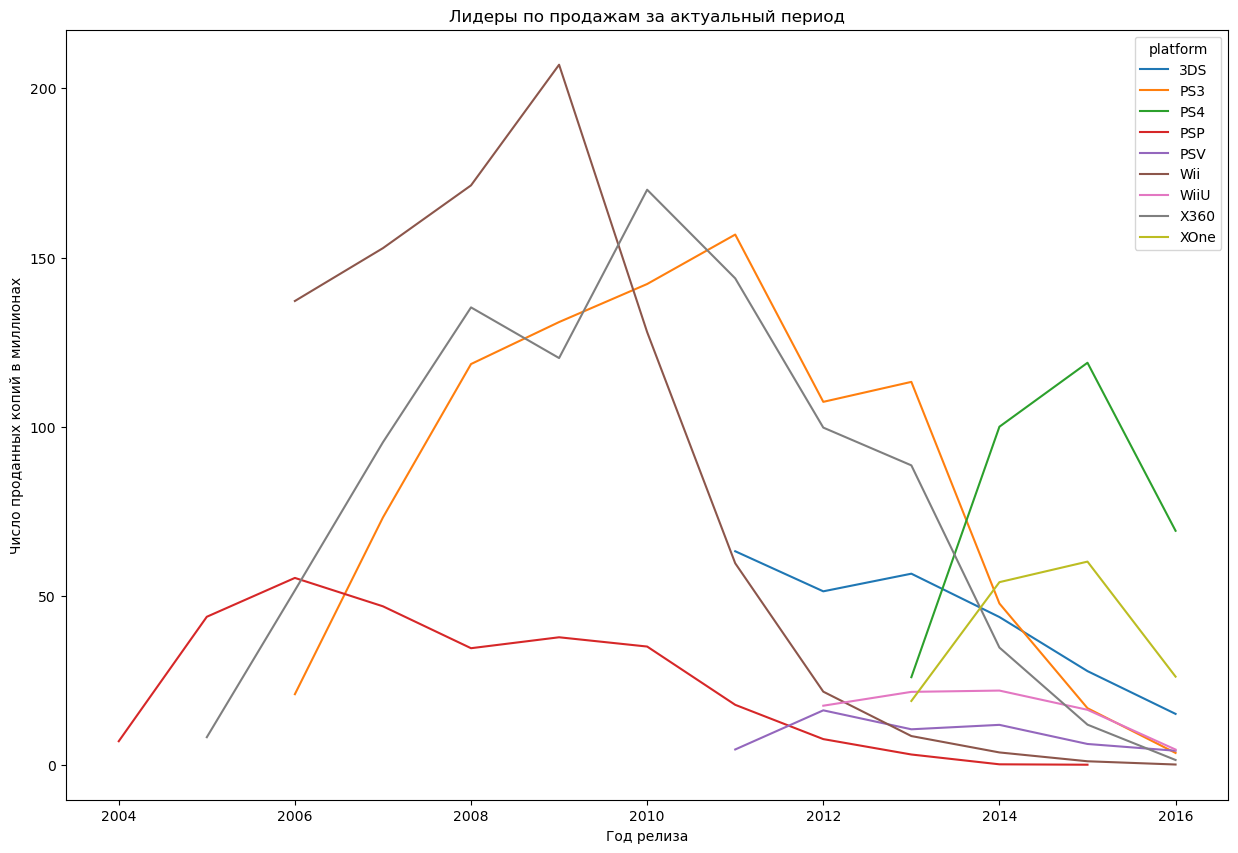

In [25]:
relevance = relevance.loc[relevance['min'] >= 2003]
games.query('platform in @relevance.index & year_of_release < 2020')\
.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum')\
.plot(figsize=(15,10), title='Лидеры по продажам за актуальный период', xlabel='Год релиза', ylabel='Число проданных копий в миллионах')
plt.show()

Лидерами по продажам можно выделить такие платформы как Wii, X360 и PS3. Так же можно отметить их резкое падение популярности, поскольку им на замену начали выпускаться консоли нового поколения такие как WiiU, XOne и PS4 соответственно. По графикам виден их рост на фоне резкого спада популярности консолей старого поколения.

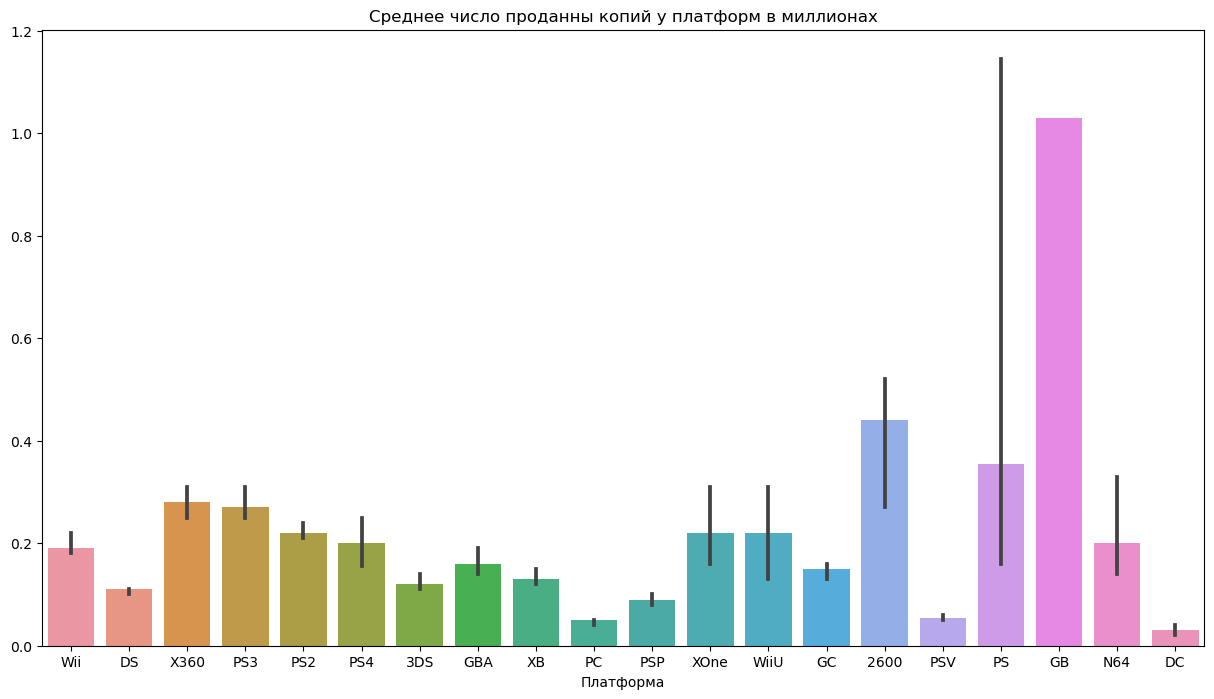

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(ax=ax, data=games, x='platform', y='sales_sum', estimator=np.median)
ax.set(title='Среднее число проданны копий у платформ в миллионах', xlabel='Платформа', ylabel='')
plt.show()

По диаграмме размаха можно сказать, что на консолях PS нового поколения медиана продаж выше, чем на предшественниках, что не противоречит выводу о развитии игровой индустрии и увеличении числа пользователей этих консолей. Для консолей Wii и XBOX такого сказать не получится, скорее всего потому что они вышли не так давно относительно всех исследуемых консолей и делать вывод по ним будет некорректно.

### Влияние отзывов пользователей и критиков на число продаж

В качестве примера возьмем консоль прошлого поколения PS3. Она достигла пика продаж и является более не актуальной.

0.12620721029297052


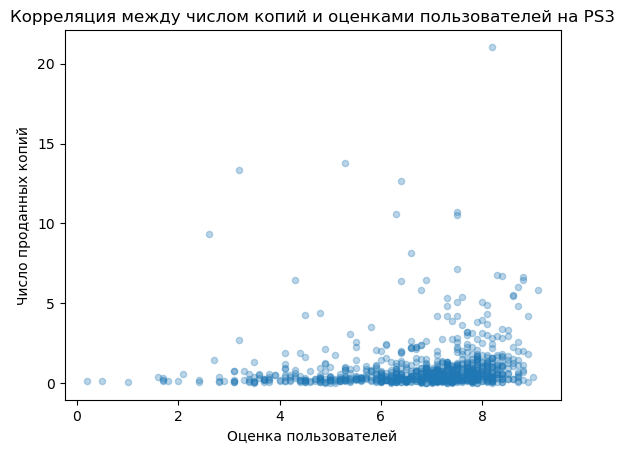

In [27]:
ps3_strict = games.query('platform == "PS3"')
print(ps3_strict['sales_sum'].corr(ps3_strict['user_score']))
games.query('platform == "PS3"').plot(x='user_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками пользователей на PS3',
                                     xlabel='Оценка пользователей', ylabel='Число проданных копий')
plt.show()

По диаграмме размаха можно сказать, что зависимости между отзывами пользователей и числом продаж нет. Корреляция между этими значениями ровна 0.13, что лишь доказывает отсутствие взаимосвязи.

0.4333726930024989


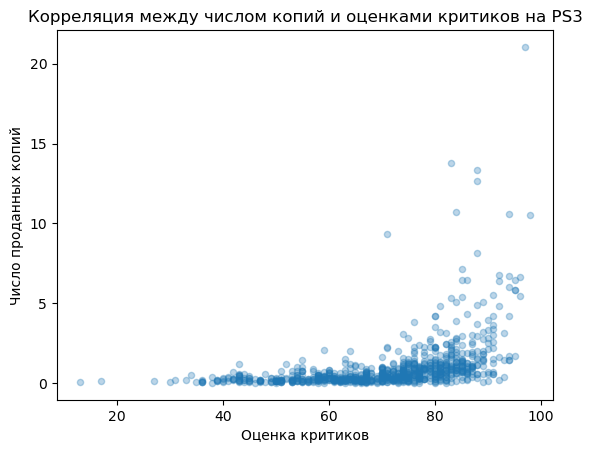

In [28]:
ps3_strict = games.query('platform == "PS3"')
print(ps3_strict['sales_sum'].corr(ps3_strict['critic_score'].astype('float')))
games.query('platform == "PS3"').plot(x='critic_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками критиков на PS3',
                                     xlabel='Оценка критиков', ylabel='Число проданных копий')
plt.show()

На диаграмме размаха видно, что присутствует слабая взаимосвзять между рейтингом критиков и числом продаж. Например у игр с суммарным числом продаж более 5млн рейтинг критиков более 80. Корреляция равная 0.43 это также доказывает.

Еще парой примеров возьмем консоли x360 и wii, которые вышли примерно в те же годы, что и PS3, а также достигли максимума своих продаж и ныне являются неактуальными.

0.11445883015686656


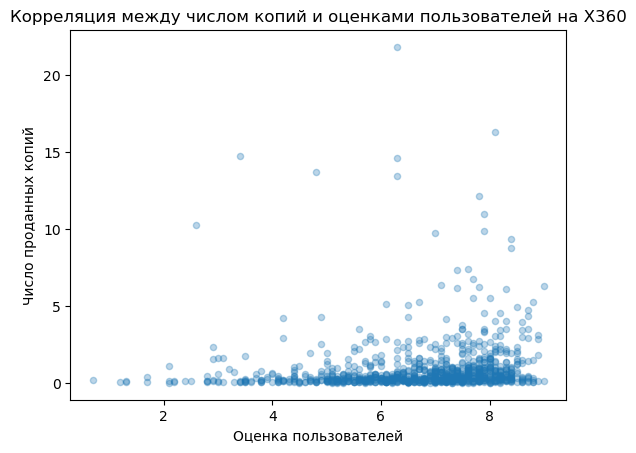

In [29]:
x360_strict = games.query('platform == "X360"')
print(x360_strict['sales_sum'].corr(x360_strict['user_score']))
games.query('platform == "X360"').plot(x='user_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками пользователей на X360',
                                     xlabel='Оценка пользователей', ylabel='Число проданных копий')
plt.show()

0.11241436303583764


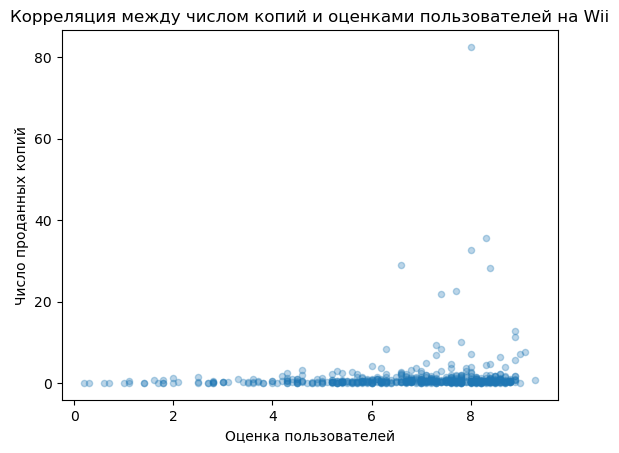

In [30]:
wii_strict = games.query('platform == "Wii"')
print(wii_strict['sales_sum'].corr(wii_strict['user_score']))
games.query('platform == "Wii"').plot(x='user_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками пользователей на Wii',
                                     xlabel='Оценка пользователей', ylabel='Число проданных копий')
plt.show()

У обеих консолей также наблюдается отсутствие взаимосвязи между рейтингом пользователей и числом продаж. Это лишь подкрепляет выводы, составленные о консоли PS3.

0.3937358667184055


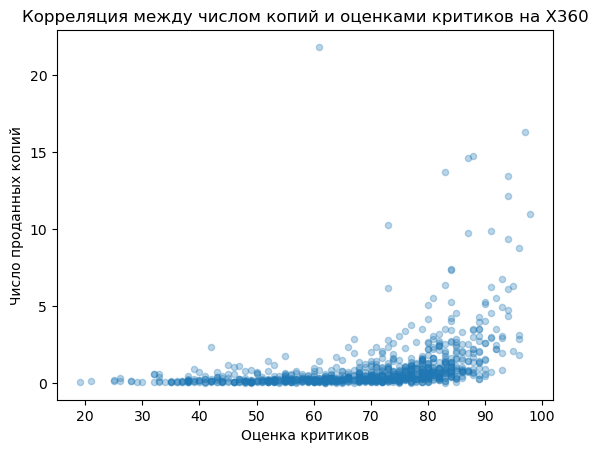

In [31]:
x360_strict = games.query('platform == "X360"')
print(x360_strict['sales_sum'].corr(x360_strict['critic_score'].astype('float')))
games.query('platform == "X360"').plot(x='critic_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками критиков на X360',
                                     xlabel='Оценка критиков', ylabel='Число проданных копий')
plt.show()

0.17755989219601348


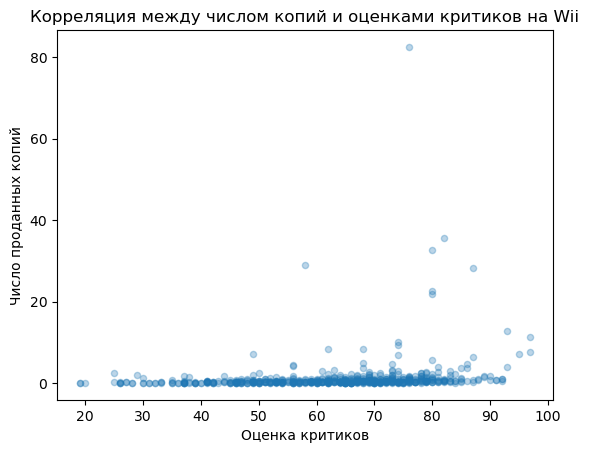

In [32]:
wii_strict = games.query('platform == "Wii"')
print(wii_strict['sales_sum'].corr(wii_strict['critic_score'].astype('float')))
games.query('platform == "Wii"').plot(x='critic_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками критиков на Wii',
                                     xlabel='Оценка критиков', ylabel='Число проданных копий')
plt.show()

В случае с рейтингом критиков у консоли x360 диаграмма и корреляция схожи с ps3, что нельзя сказать о консоли wii. У нее диаграмма выглядит линейной с малым количесвом выбросов, большая часть из которых находятся при значении critic score большим 70. Такая разница возникла скорее всего из за большого количества пропусков в столбце critic_score. Поэтому составить объективную картину относительно отзывов является невозможным.

### Влияние на консоли нового поколения

Проверим также зависимость оценок пользователей и критиков от числа проданных копий на консоли нового поколения PS4.

-0.031957106803335036


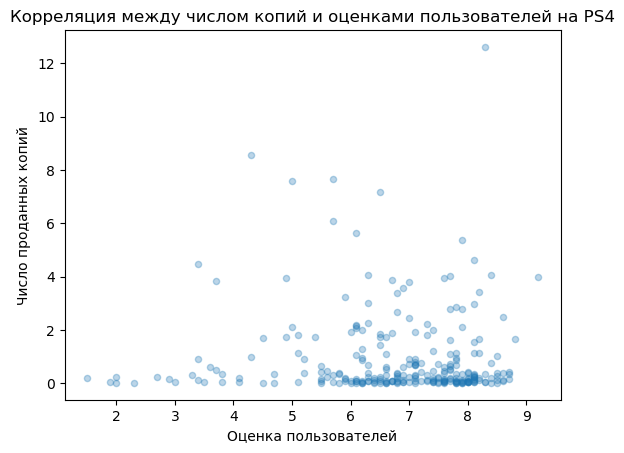

In [33]:
ps4_strict = games.query('platform == "PS4"')
print(ps4_strict['sales_sum'].corr(ps4_strict['user_score']))
games.query('platform == "PS4"').plot(x='user_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками пользователей на PS4',
                                     xlabel='Оценка пользователей', ylabel='Число проданных копий')
plt.show()

0.40656790102834933


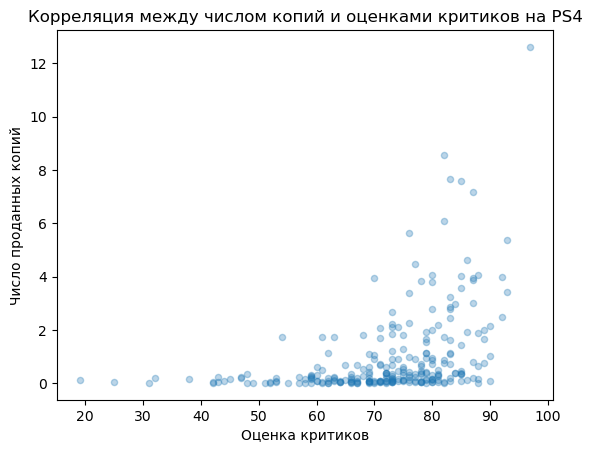

In [34]:
ps4_strict = games.query('platform == "PS4"')
print(ps4_strict['sales_sum'].corr(ps4_strict['critic_score'].astype('float')))
games.query('platform == "PS4"').plot(x='critic_score', y='sales_sum', kind='scatter', alpha=.3,
                                     title='Корреляция между числом копий и оценками критиков на PS4',
                                     xlabel='Оценка критиков', ylabel='Число проданных копий')
plt.show()

Проверка зависимости числа продаж от рейтингов критиков и пользователей на PS4 доказала наличие зависимости между числом продаж и оценками критиков, хоть и слабо проявлена из за малого количества данных, чего нельзя сказать о связи с оценками пользователей.

### Зависимость между жанром игр и их прибыльностью

In [35]:
genres = games.pivot_table(index='genre', values='sales_sum', aggfunc=(['count','sum']))
genres.columns = ['count', 'sum']
genres.sort_values('sum', ascending=False)

,count,sum
genre,,
Action,2905,1373.800049
Sports,1655,994.500000
Shooter,1021,843.679993
Misc,1535,683.000000
Role-Playing,1192,638.500000
Racing,841,460.260010
Platform,586,395.309998
Simulation,722,303.690002
Fighting,551,253.490005


Самым прибыльным жанром является Action, число игр в этом жанре и число проданных копий у него самые высокие. В топ 3 также попадают жанры Sports и Shooter, хоть число проданных копий у обоих жанров отличаются от Экшн в два и в три раза соответсвтенно, но суммарная прибыль отличается всего на 30 и 40 процентов соответственно. 

In [36]:
# исключаем игры-хиты с числом копий от 1 млн
genres = games.query('sales_sum < 1').pivot_table(index='genre', values='sales_sum', aggfunc=(['count','sum']))
genres.columns = ['count', 'sum']
genres.sort_values('sum', ascending=False)

,count,sum
genre,,
Action,2580,583.429993
Sports,1449,376.380005
Misc,1403,286.070007
Role-Playing,1054,222.910004
Shooter,817,204.649994
Racing,734,160.009995
Simulation,658,133.149994
Adventure,1100,116.559998
Platform,492,115.370003


Проведя доп исследование и приняв за игры-хиты строки с суммарным числом продаж более 1 млн копий, видны изменения в рейтинге жанров по числу продаж. Экшн игры все так же занимаю первое место в рейтинге, однако далее с небольшим отрывом идут игры в жанре Спорт и игры с неопределенным жанром. Также можно сказать, что разница в числе проданных копий у разных жанров без учета топовых игр намного меньше, чем с ними.

## Портрет типичного пользователя в регионах

### NA регион

In [37]:
na_platforms = games.pivot_table(index='platform', values='na_sales', aggfunc=['count', 'sum'])
na_platforms.columns = ['count','sum']
na_platforms.sort_values('sum', ascending=False).head()

,count,sum
platform,,
X360,1262,602.469971
Wii,1320,496.899994
PS3,1330,393.489990
PS2,1614,391.730011
DS,2150,382.399994


Самой популярной в Северной Америке консолью в датасете является X360. В топ 5 входят также японские консоли Wii, PS3, PS2 и DS.

              count         sum
genre                          
Action         2905  672.700012
Sports         1655  515.900024
Shooter        1021  454.839996
Misc           1535  347.380005
Role-Playing   1192  247.979996
Racing          841  215.910004


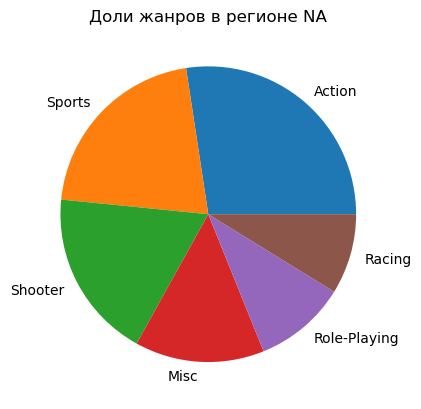

In [38]:
na_genres = games.pivot_table(index='genre', values='na_sales', aggfunc=['count', 'sum'])
na_genres.columns = ['count','sum']
print(na_genres.sort_values('sum', ascending=False).head(6))
na_genres['sum'].sort_values(ascending=False).head(6).plot(kind='pie', title='Доли жанров в регионе NA', ylabel='')
plt.show()

Топ 5 жанров в Америке не отличается от топа по всем регионам. Это говорит о том, что американский регион имеет наибольшую долю от общего числа купленных игр.

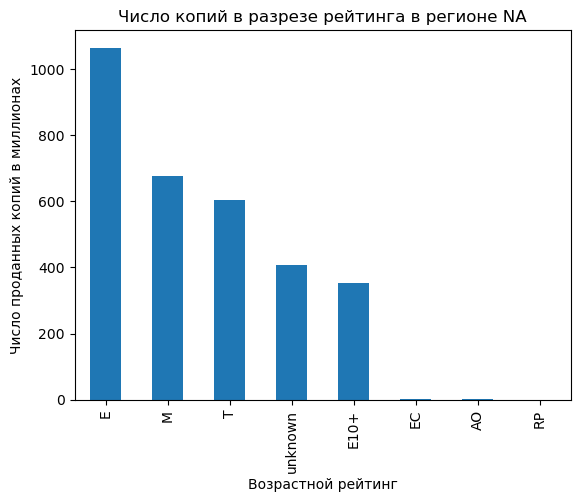

In [39]:
games.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False).plot(
    kind='bar', title='Число копий в разрезе рейтинга в регионе NA', 
    xlabel='Возрастной рейтинг', ylabel='Число проданных копий в миллионах')
plt.show()

### EU регион

In [40]:
eu_platforms = games.pivot_table(index='platform', values='eu_sales', aggfunc=['count', 'sum'])
eu_platforms.columns = ['count','sum']
eu_platforms.sort_values('sum', ascending=False).head()

,count,sum
platform,,
PS3,1330,330.279999
X360,1262,270.760010
Wii,1320,262.209991
PS2,1614,211.009995
DS,2150,188.889999


В отличие от американского региона в Европе самые продаваемые игры на PS3 консоли, в топ 5 консолей входят те же приставки, что и в Америке. Также можно сказать, что общее число продаж в Европе намного меньше, чем в Америке. Это может говорить о меньшей покупательной способности в европейском регионе, либо о низкой популярности игровой индустрии, по сравнению с Америкой.

              count         sum
genre                          
Action         2905  417.619995
Sports         1655  301.880005
Shooter        1021  272.190002
Misc           1535  186.130005
Racing          841  160.759995
Role-Playing   1192  138.419998


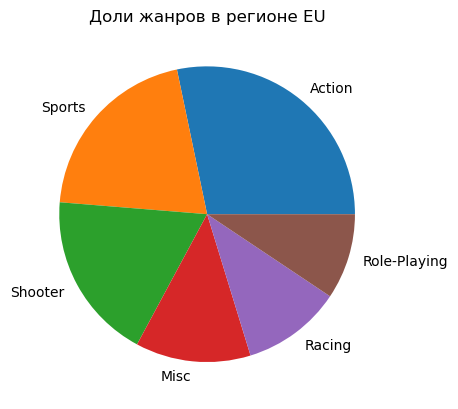

In [41]:
eu_genres = games.pivot_table(index='genre', values='eu_sales', aggfunc=['count', 'sum'])
eu_genres.columns = ['count','sum']
print(eu_genres.sort_values('sum', ascending=False).head(6))
eu_genres['sum'].sort_values(ascending=False).head(6).plot(kind='pie', title='Доли жанров в регионе EU', ylabel='')
plt.show()

Европейский регион не сильно отличается также и по жанрам игр в сравнении с Америкой. Здесь также преобладают жанры Action, Sports и Shooter, но в отличии от Америки, в Европе в топ 5 входит жанр Racing.

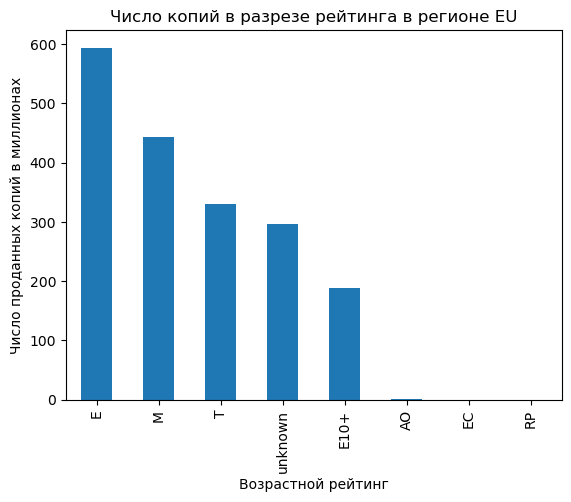

In [42]:
games.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False).plot(
    kind='bar', title='Число копий в разрезе рейтинга в регионе EU', 
    xlabel='Возрастной рейтинг', ylabel='Число проданных копий в миллионах')
plt.show()

### JP регион

In [43]:
jp_platforms = games.pivot_table(index='platform', values='jp_sales', aggfunc=['count', 'sum'])
jp_platforms.columns = ['count','sum']
jp_platforms.sort_values('sum', ascending=False).head(10)

,count,sum
platform,,
DS,2150,175.550003
3DS,520,100.669998
PS2,1614,90.690002
PS3,1330,80.190002
PSP,1209,76.779999
Wii,1320,69.330002
GBA,516,27.660000
PSV,430,21.910000
PS4,392,15.960000


В японском регионе топ 5 консолей занимают лишь отечественные представители. Основным отличием можно заметить портативную консоль 3DS, которая в остальных регионах не собрала больших продаж, однако в Японии она является второй консолью с самыми продаваемыми играми. X360 даже не попал в топ 10.

              count         sum
genre                          
Role-Playing   1192  204.740005
Action         2905  118.690002
Misc           1535   79.589996
Sports         1655   61.540001
Platform        586   44.770000
Fighting        551   36.169998


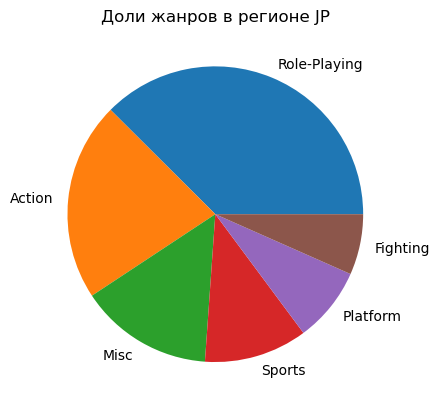

In [44]:
jp_genres = games.pivot_table(index='genre', values='jp_sales', aggfunc=['count', 'sum'])
jp_genres.columns = ['count','sum']
print(jp_genres.sort_values('sum', ascending=False).head(6))
jp_genres['sum'].sort_values(ascending=False).head(6).plot(kind='pie', title='Доли жанров в регионе JP', ylabel='')
plt.show()

Японский рынок сильно отличается от Америки и Европы. Здесь с большим отрывом жанр Role-Playing выделяется на фоне остальных. Жанры Action и Sports также входят в топ 5, но их число продаж заметно ниже в отличие от топ-1 жанра. По этим данным можно сделать вывод о заметном различии в предпочтениях японских пользователей с другими регионами.

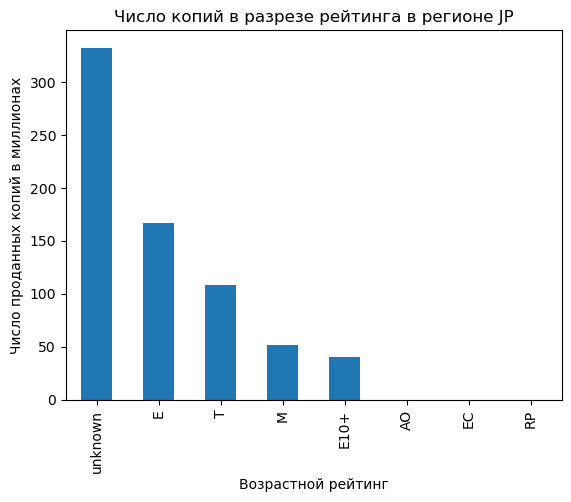

In [45]:
games.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False).plot(
    kind='bar', title='Число копий в разрезе рейтинга в регионе JP', 
    xlabel='Возрастной рейтинг', ylabel='Число проданных копий в миллионах')
plt.show()

В отличии от других регионов, в Японии возрастной рейтинг является совсем незначимым фактором в популярности игры. Наибольшая часть проданных в Японии игр не имеют возрастного рейтинга.

## Проверка гипотез

### Являются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми

За **нулевую гипотезу(H0)** примем рейтинги пользователей на платформах xbox и pc одинаковыми. За **альтернативную гипотезу(H1)** возьмем соответственно рейтинги пользователей отличающимися. За критический уровень статистической значимости возьмем **alpha=0.01**

In [46]:
xone_user_scores = games.loc[games['platform'] == 'XOne', 'user_score'].dropna()
pc_user_scores = games.loc[games['platform'] == 'PC', 'user_score'].dropna()
alpha = .01
results = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.000146003996273376
Отвергаем нулевую гипотезу


Значение p-value составляет менее 0.01 процента. Поэтому можно с уверенностью отвергнуть нулевую гипотезу в пользу альтернативной - рейтинги пользователей на платформах Xbox One и PC отличаются.

### Средние пользовательские рейтинги жанров Action и Sports разные

За **нулевую гипотезу(H0)** примем рейтинги пользователей в жанрах Action и Sports одинаковыми. За **альтернативную гипотезу(H1)** возьмем соответственно рейтинги пользователей отличающимися. За критический уровень статистической значимости возьмем **alpha=0.01**

In [47]:
action_user_scores = games.loc[games['genre'] == 'Action', 'user_score'].dropna()
sports_user_scores = games.loc[games['genre'] == 'Sports', 'user_score'].dropna()
alpha = .01
results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.004754368411781369
Отвергаем нулевую гипотезу


P-value равно 0.4 процента, что сильно меньше критического уровня статистической значимости выбранной для данной гипотезы. Имея все ранее сказанное можно отклонить нулевую гипотезу в пользу альтернативной - средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

Выполнив предобработку данных и проведя ряд исследований в датасете с видеоиграми, мы выяснили, в какие годы игры стали популярны в широких массах, определили, за какое время платформы теряют свою актуальность с момента выхода, рассмотрели влияние отзывов критиков и пользователей на продажи с учетом имеющихся пропусков, нашли потенциально прибыльные платформы в 2016 году. Также составили характерный портрет пользователя по регионам и проверили две гипотезы.

Исходя из результатов исследований можно сказать, что игры приобрели большую популярность в мире только к 1995 году и со временем их популярность только растет. Самой популярной консолью за исследуемый промежуток времени можно назвать PS2 - она была актуальна на рынке целых 11 лет и имеет более 1,2 млд проданных игр, что является рекордом среди конкурентов.

Ввиду большого числа пропусков в данных с рейтингом пользователей и критиков сделать объективный анализ зависимости числа проданных копий от обоих рейтингов не возможно. 

Общую картину по популярности отдельных жанров во всех регионах можно составить такой: Action, Sports, Shooter, Role-Playing и Racing. В данных так же присутствует большое количество игр с неопределенными или слишком непопулярными жанрами, которые определили в одну категорию Misc.

Составляя общую картину, можно сказать, что:
 - В Северной Америке самой популярной консолью является XBox 360, а любимые жанры совпадают с популярными жанрами по всем регионам (Action, Sports, Shooter, Role-Playing и Racing).
 - В европейском регионе люди отдают предпочтение консолям серии PlayStation, любимые жанры аналогичны жанрам в Америке.
 - В японском регионе в топ 5 консолей входят только консоли отечественных производителей Nintendo и Sony. Любимый жанр игр в Японии - Role-Playing. В отличии от других регионов в Японии возрастной рейтинг игры не влияет на ее число продаж.

Проверены две гипотезы и сделаны соответствующие выводы:
 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются
 - Средние пользовательские рейтинги жанров Action и Sports отличаются
 - В силу большого числа пропусков в столбцах с рейтингом пользователей, выводы по обеим гипотезам можно поставить под сомнение.
